In [2]:
#Derivacion en sympy

import sympy as sp

x=sp.symbols('x')
f_exp=sp.exp(x)*sp.cos(x)
d1f_exp=sp.diff(f_exp,x,1)
print('Para la función: ',f_exp)
print('La derivada primera es: ',d1f_exp)

Para la función:  exp(x)*cos(x)
La derivada primera es:  -exp(x)*sin(x) + exp(x)*cos(x)


In [ ]:
#Método de Newton-Raphson

import numpy as np
import sympy as sp

x = sp.symbols('x', real=True) # define la variable simbólica x

f_expr = x**3-2 # Expresion con la que se evalua el metodo
f_der_expr = sp.diff(f_expr,x)

f = sp.lambdify(x,f_expr)
f_der = sp.lambdify(x,f_der_expr)

N_max = 10 # Numero maximo de repeticiones
tol = 1.e-9 # Tolerancia minima a la que tiene que llegar el metodo
x0 = 1. # Punto por le que se comienza la aproximacion

x_aprox = np.zeros(N_max)
x_aprox[0] = x0

for k in range(1,N_max):
    if ( np.abs( f_der(x_aprox[k-1]) ) < 1.e-14 ): break

    x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1])/f_der(x_aprox[k-1])

    if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): break

print('Número de iteraciones realizadas: ', k) 
print('Aproximación de la raíz: ', x_aprox[k])
display(x_aprox)#Saca todas la iteraciones

Número de iteraciones realizadas:  5
Aproximación de la raíz:  1.2599210498948732


array([1.        , 1.33333333, 1.26388889, 1.25993349, 1.25992105,
       1.25992105, 0.        , 0.        , 0.        , 0.        ])

Comprobar continuidad de una funcion:

    Para esto lo que tenemos que hacer es haller el valor de del punto x en la funcion.
    Luego de esto calculamos el limite de cuando x tiende a punto utilizado anteriormente, 
    por la derecha y por la izquierda. En el caso de que esto 3 valores coincidan, podemos 
    determinar que la funcion es continua en ese punto.

    (Esto es util cuando tenemos una funcion definida a trozos y tenemos que comprobar la 
    continuidad cuando la funcion cambia)

Clase de una funcion:

    La clase de una funcion se establece dependiendo de si la funcion es continua en la dericada de la funcion que estemos, es decir:

        continua sin derivar -> Clase 0
        continua primera derivada -> Clase 1
        continua segunda derivada -> Clase 2

Puntos criticos:

    Son los valores que obtenemos de x = 0 en la primera derivada
    Son los puntos donde la derivada de la funcion no esta definida

Extremos relativos:

    Se obtienen cogiendo los puntos criticos de la funcion
    Si el punto critico en la segunda derivada es > 0 entonces es un minimo local
    Si el punto critico en la segunda derivada es < 0 entonces es un maximo local
    En el caso de que la derivada no este definida en el punto, podemos comprobar
    el comportamiento de la funcion en valores proximos al punto critico y estudiarlo.

    (En el caso de |x| al no tener ser continua en 0, se comprueba como se comporta
    la funcion en valores cercanos a 0 y se puede ver que cuando x < 0 desciende y 
    cuando x > 0 asciende, por lo que se puede determinar que ahi hay un minimo local)

Extremos absolutos:

    Se calcula el valor de los minimos y maximos, estos se comparan y se coge el valor mas
    pequeño como el minimo absoluto y el mas grande como el maximo absoluto

Evaluar funciones Sympy:

    resultado = f.subs(x, 2)  # Sustituir x = 2
    print(resultado)

    resultado = f.evalf(subs={x: 2})  # Evaluar para x = 2
    print(resultado)

Expresión que queremos derivar:  x**3*exp(x)
Primera derivada:  x**3*exp(x) + 3*x**2*exp(x)
Segunda derivada:  x*(x**2 + 6*x + 6)*exp(x)
Tercera derivada:  (x**3 + 9*x**2 + 18*x + 6)*exp(x)


0

0

f es de clase 0? True


0

0

f es de clase 1? True


0

0

f es de clase 2? True
f2_0Minus =  0 , f2_0Plus =  0
Existe f''(0)? True


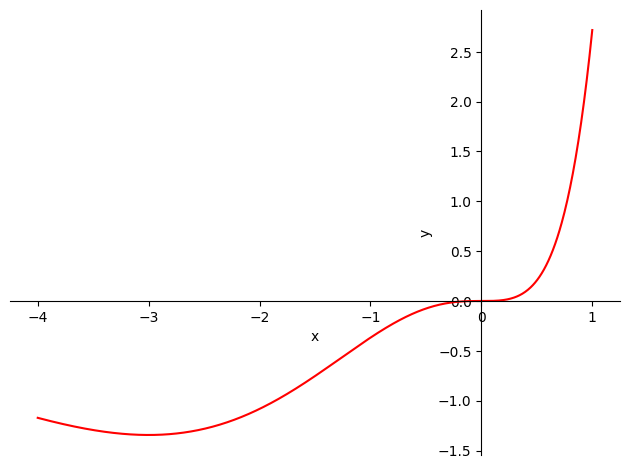

In [3]:
#Derivadas sucesivas y clases de funciones

import sympy as sp

#Derivadas sucesivas

x = sp.symbols('x', real=True)
f_exp = x**3*sp.exp(x)
print('Expresión que queremos derivar: ',f_exp)
print('Primera derivada: ',sp.diff(f_exp,x))
print('Segunda derivada: ',sp.diff(f_exp,x,2))
print('Tercera derivada: ',sp.diff(f_exp,x,3))

#Clases de funciones

f = sp.Lambda(x, f_exp)
display(sp.limit(f(x),x,0,dir='-'))
display(sp.limit(f(x),x,0,dir='+'))
print('f es de clase 0?', sp.limit(f(x),x,0) == f(0))

f1 = sp.Lambda(x, f_exp.diff(x,1))
display(sp.limit(f1(x),x,0,dir='-'))
display(sp.limit(f1(x),x,0,dir='+'))
print('f es de clase 1?', sp.limit(f1(x),x,0) == f(0))

f2 = sp.Lambda(x, f_exp.diff(x,2))
display(sp.limit(f2(x),x,0,dir='-'))
display(sp.limit(f2(x),x,0,dir='+'))
print('f es de clase 2?', sp.limit(f2(x),x,0) == f(0))

#Existe derivada segunda?

h = sp.symbols('h', real=True)
f2_0Minus = sp.limit((f1(h) - f1(0)) / h, h, 0, dir='-')
f2_0Plus = sp.limit((f1(h) - f1(0)) / h, h, 0, dir='+')
print('f2_0Minus = ', f2_0Minus, ', f2_0Plus = ', f2_0Plus) 
print('Existe f\'\'(0)?',f2_0Minus==f2_0Plus)

p = sp.plot(f_exp, (x, -4, 1), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.show()

In [19]:
#Extremos

import sympy as sp
import numpy as np

# 1. Resolvemos el problema utilizando Sympy
x,xn=sp.symbols('x,xn')
# Funcion que describe el area de la seccion en funcion del angulo
f=4*sp.sin(x)*(1+sp.cos(x))
d1f=sp.diff(f,x)
d1fn=sp.lambdify(x,d1f)
alphamax=sp.solve(d1f)
print('La sección máxima se alcanza con ángulo: ',float(alphamax[1]))

# 2. Aproximamos el máximo con el método de Newton
maxit=100
eps=1e-4
d2f=sp.diff(d1f,x)
d2fn=sp.lambdify(x,d2f)
xn=np.pi/2
for i in range(0,maxit):
    res=d1fn(xn)/d2fn(xn)
    xn=xn-res
    if (np.abs(res)<eps):
        break
print('Numero de iteraciones realizadas: ',i)
print('Aproximación del ángulo para la sección máxima con NR: ',xn)

La sección máxima se alcanza con ángulo:  1.0471975511965979
Numero de iteraciones realizadas:  4
Aproximación del ángulo para la sección máxima con NR:  1.0471975511965559


In [27]:
#Teorema de Taylor

import sympy as sp
import numpy as np

x, t = sp.symbols('x, t', real =True)

# Importamos la function que calcula el polinomio y el resto de Taylor
def taylor(f_exp,x0,n):
    p_exp = 0
    for i in range(n+1):
        p_exp += sp.diff(f_exp,x,i).subs(x,x0)/sp.factorial(i)*(x-x0)**i
        
    R_exp = sp.diff(f_exp,x,n+1).subs(x,t)/sp.factorial(n+1)*(x-x0)**(n+1)
    return p_exp,R_exp

#Los datos

x0 = 1  # punto en el que centramos el polinomio de Taylor
f_exp = sp.log(x) # función que queremos aproximar

# calculamos el Polinomio de Taylor de orden 1 centrado en x0
n = 1 #orden

P1_exp, R1_exp = taylor(f_exp,x0,n)
print('Polinomio de Taylor de orden 1: \n',P1_exp,'\n Resto de Taylor de orden 1: \n',R1_exp,'\n')

# Creamos una función sp.lambdify del polinomio 
P1 = sp.lambdify (x,P1_exp)
print('Aproximación de ln(1.3) con el polinomio de Taylor de orden 1: ', P1(1.3))

# calculamos el Polinomio de Taylor de orden 2 centrado en x0
n = 2 

P2_exp, R2_exp = taylor(f_exp,x0,n)
print('Polinomio de Taylor de orden 2: \n',P2_exp,'\n Resto de Taylor de orden 1: \n',R2_exp,'\n')

# Creamos una función sp.lambdify del polinomio 
P2 = sp.lambdify (x,P2_exp)
print('Aproximación de ln(1.3) con el polinomio de Taylor de orden 2: ', P2(1.3))

R2_exp_xfijo = R2_exp.subs({x:1.3})
R2 = sp.Lambda (t, R2_exp_xfijo)

#Comprobamos que R2 no tiene puntos críticos
ptos_criticos_R2 = sp.solve (sp.diff(R2,x))
print('ptos_criticos_R2: ',ptos_criticos_R2)

# Elegimos el máximo de R2, en valor absoluto, comparando sus valores en los extremos del intervalo
cota_error = sp.Max( sp.Abs(R2(1.)), sp.Abs(R2(1.3)) )

print('Cota del error: ',cota_error)

#Representacion grafica un tanto innecesaria

#import matplotlib as mp
#import matplotlib.pyplot as plt

# Creamos gráficos de funciones
#x1 = np.linspace(0.4, 2.5, 200)
#y1 = np.log(x1)

# evaluamos P2 en los puntos de x1
#P1x = P1(x1)
#P2x = P2(x1)

#fig, axs = plt.subplots(1, 2, figsize=(20,10))

#ax1 = axs[0]
#ax1.plot(x1, y1, c='b', lw='3',  label='$f(x)=\ln(x)$')
#ax1.plot(x1, P1x, c='k', ls='--', lw='3', label='$P_1(x)=x-1$')
#ax1.plot(x1, P2x, c='r', ls='--', lw='3', label='$P_2(x)=x-1 - \dfrac{(x-1)^2}{2}$')
#ax1.set_ylabel('Y', fontsize=10)
#ax1.set_xlabel('X', fontsize=10)
#ax1.grid()
#ax1.legend(prop={'size': 18})


#ax2 = axs[1]
#ax2.plot(x1, y1, c='b', lw='3', label='$f(x)=\ln(x)$')
#ax2.plot(x1, P1x, c='k', ls='--', lw='3', label='$P_1(x)=x-1$')
#ax2.plot(x1, P2x, c='r', ls='--', lw='3', label='$P_2(x)=x-1 - \dfrac{(x-1)^2}{2}$')
#ax2.set_ylabel('Y', fontsize=10)
#ax2.set_xlabel('X', fontsize=10)
#plt.xlim(0.8,1.4)
#plt.ylim(-0.3,0.5)
#ax2.set_xticks(np.arange(0.8,1.5,0.1))
#ax2.set_yticks(np.arange(-0.3,0.6,0.1))
#ax2.grid()
#ax2.legend(prop={'size': 18})

# Dibujamos R2 en [1,1.3]
#R2_vec = sp.lambdify(t,R2_exp_xfijo)
#s1 = np.linspace(1, 1.3, 100)
#R2_s1 = R2_vec(s1)
#plt.plot(s1, R2_s1, c='b', lw='3',  label='$R2(x)=0.3^{3}/{6}\; f^{3)}(s)$')
#plt.ylabel('Y', fontsize=10)
#plt.xlabel('X', fontsize=10)
#plt.grid()
#plt.legend(prop={'size': 14})
#plt.show()

Polinomio de Taylor de orden 1: 
 x - 1 
 Resto de Taylor de orden 1: 
 -(x - 1)**2/(2*t**2) 

Aproximación de ln(1.3) con el polinomio de Taylor de orden 1:  0.30000000000000004
Polinomio de Taylor de orden 2: 
 x - (x - 1)**2/2 - 1 
 Resto de Taylor de orden 1: 
 (x - 1)**3/(3*t**3) 

Aproximación de ln(1.3) con el polinomio de Taylor de orden 2:  0.2550000000000001
ptos_criticos_R2:  []
Cota del error:  0.00900000000000000
